# **FASE I - Proyecto de Data Science Parte I: Análisis Exploratorio del Dataset Fetal Health**

# Abstract

La vigilancia de la salud fetal es clave para reducir la morbilidad y mortalidad perinatal, objetivos alineados con las metas de desarrollo sostenible. Los cardiotocogramas (CTG) constituyen una herramienta clínica accesible que registra el ritmo cardíaco fetal y la actividad uterina, permitiendo detectar patrones de riesgo y anticipar intervenciones. En este trabajo se analiza el dataset “Fetal Health” (Kaggle), compuesto por 2.126 registros de exámenes CTG evaluados por tres obstetras y clasificados en tres categorías de salud fetal: Normal, Suspect y Pathological. El conjunto incluye variables numéricas derivadas de la señal, entre ellas el valor basal del FHR (baseline value), aceleraciones, movimientos fetales, contracciones uterinas, diferentes tipos de desaceleraciones (leves, severas, prolongadas), medidas de variabilidad a corto y largo plazo y estadísticos de histograma (ancho, mínimo, máximo, moda, media, mediana, varianza, número de picos y ceros, tendencia), además de la variable objetivo fetal_health.

El objetivo de esta primera entrega es realizar un análisis exploratorio que caracterice la distribución de las variables, identifique valores faltantes y outliers, y examine relaciones univariadas, bivariadas y multivariadas que ayuden a comprender cómo se asocian los rasgos del CTG con el estado de salud fetal. En particular, se propone explorar si la variabilidad (corta y larga), la frecuencia de desaceleraciones y los estadísticos del histograma presentan patrones diferenciables entre clases, así como evaluar el balance de clases y posibles correlaciones fuertes entre características que podrían informar pasos posteriores de modelado.

La contribución esperada es un diagnóstico descriptivo respaldado por visualizaciones (histogramas y boxplots para distribución y atípicos; diagramas de dispersión con codificación por clase para relaciones clave; y un mapa de calor de correlaciones) y resúmenes numéricos que permitan responder preguntas iniciales e informar hipótesis sobre qué variables son más relevantes para discriminar estados de riesgo. Este análisis no pretende establecer causalidad ni construir modelos predictivos en esta etapa; su alcance es exploratorio y busca sentar bases sólidas para fases siguientes (selección de variables, ingeniería de características y validación de modelos). Las limitaciones incluyen el posible desbalance de clases y la alta colinealidad entre ciertas medidas derivadas del histograma y la variabilidad, factores que se tendrán en cuenta al interpretar los hallazgos.

Para ejecutar este notebook, descargue el archivo fetal_health.csv desde Kaggle y colóquelo en la misma carpeta que el notebook.
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

# Preguntas e Hipótesis

A partir del dataset Fetal Health, se plantean las siguientes preguntas de interés y sus hipótesis asociadas:

1. ¿El valor basal del ritmo cardíaco fetal (baseline value) difiere significativamente entre fetos normales, sospechosos y patológicos?
   - *Hipótesis:* Los casos patológicos presentan un valor basal más alto y más variable en comparación con los casos normales.

2. ¿Las desaceleraciones (light, severe y prolonged) se relacionan con un mayor riesgo de salud fetal?
   - *Hipótesis:* Los fetos clasificados como patológicos tienen una mayor frecuencia de desaceleraciones severas y prolongadas.

3. ¿La variabilidad a corto y largo plazo en el ritmo cardíaco fetal influye en la clasificación de salud fetal?
   - *Hipótesis:* Una menor variabilidad (tanto a corto como a largo plazo) se asocia con casos sospechosos y patológicos.

4. ¿Existen patrones en los histogramas de frecuencia cardíaca (ancho, varianza, número de picos) que diferencien a los fetos normales de los patológicos?
   - *Hipótesis:* Los casos patológicos tienden a mostrar histogramas más anchos, con mayor varianza y picos irregulares.

5. ¿Cómo se distribuyen las categorías de salud fetal en el dataset?
   - *Hipótesis:* La mayoría de los casos corresponden a fetos normales, mientras que las clases sospechosas y patológicas están menos representadas, lo que genera un desbalance de clases.

Estas preguntas e hipótesis orientarán el análisis exploratorio mediante visualizaciones univariadas, bivariadas y multivariadas, con el fin de identificar patrones que expliquen el estado de salud fetal y posibles factores de riesgo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de visualización
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# URL pública del Google Sheet exportado como CSV
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTJOioY2TV3u24nK2Au0l6QM-i20bKfKdnuz1qg5LPjYGZNRK3qDc-7bsd9pweZLoukwBbFaJI5AwxP/pub?gid=1853624381&single=true&output=csv"

# Leer el CSV directamente desde la URL
df = pd.read_csv(url)

# Vista inicial
print("Dimensiones del dataset:", df.shape)
df.head()



Dimensiones del dataset: (2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,6.0,0.0,6.0,3.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,3.0,0.0,8.0,3.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,3.0,0.0,8.0,3.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,7.0,0.0,8.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Diagnóstico inicial del dataset

In [2]:
## Información general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos y valores no nulos:\n")
print(df.info())

# Verificar valores faltantes
print("\nValores faltantes por columna:\n")
print(df.isnull().sum())

# Resumen estadístico básico
print("\nResumen estadístico de las variables numéricas:\n")
print(df.describe().T)

Dimensiones del dataset: (2126, 22)

Tipos de datos y valores no nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                   

## Visualización de valores faltantes

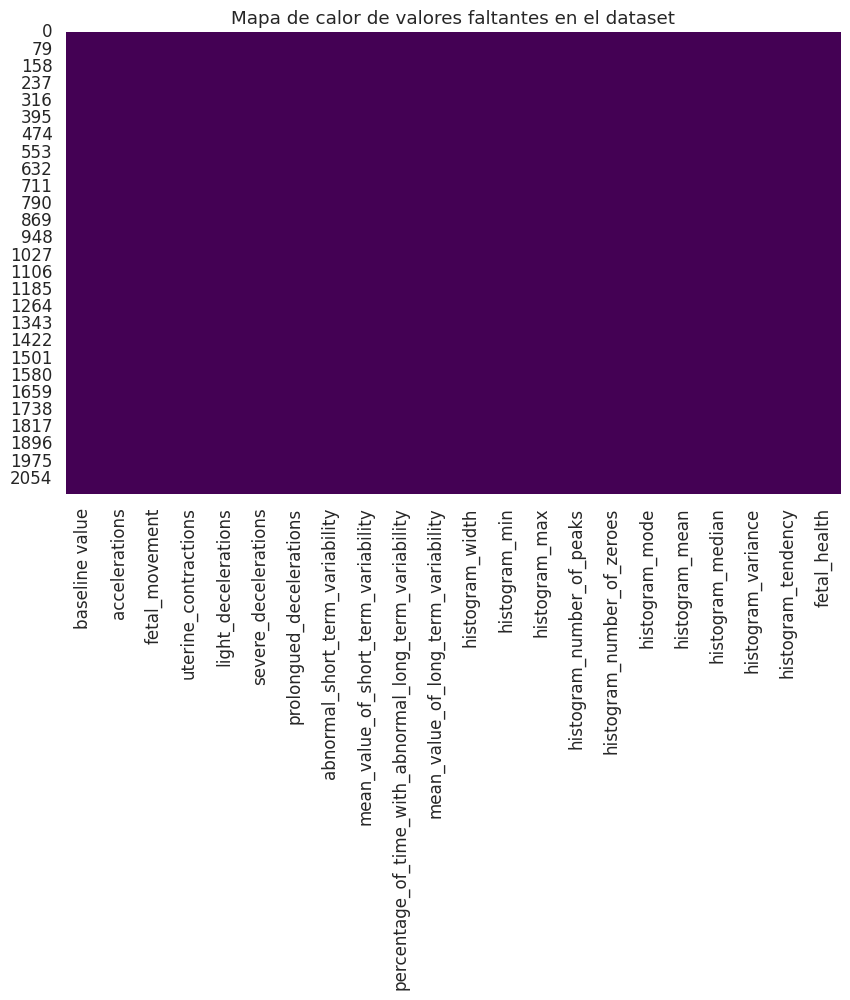

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()

### Diagnóstico de valores faltantes
El análisis muestra que el dataset no contiene valores nulos en ninguna de sus variables.
Esto es consistente con la documentación de Kaggle, que indica que el conjunto de datos
fue revisado previamente. Por lo tanto, no es necesario aplicar técnicas de imputación
y se puede proceder directamente al análisis exploratorio.

## Grafico 1 - Dispersión con 3 variables

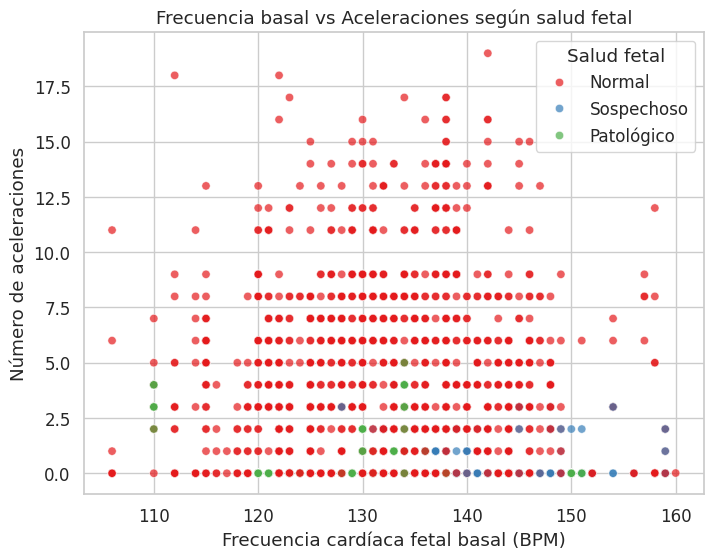

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="baseline value",
    y="accelerations",
    hue="fetal_health",
    palette="Set1",
    alpha=0.7
)

# Cambiar etiquetas de la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Normal", "Sospechoso", "Patológico"], title="Salud fetal")

plt.title("Frecuencia basal vs Aceleraciones según salud fetal")
plt.xlabel("Frecuencia cardíaca fetal basal (BPM)")
plt.ylabel("Número de aceleraciones")
plt.show()

### Interpretación
En este gráfico se observa que los **fetos normales** presentan una frecuencia basal
en rangos intermedios (120–140 BPM) y un mayor número de aceleraciones.
Los **sospechosos** muestran menos aceleraciones y valores más dispersos,
mientras que los **patológicos** tienen casi nulas aceleraciones, lo que respalda
la hipótesis de que la reactividad reducida se asocia a un peor estado de salud fetal.

## Gráfico 2 – Dispersión con 4 variables
(variabilidad corto plazo vs largo plazo, color según clase de salud fetal, tamaño según contracciones uterinas)

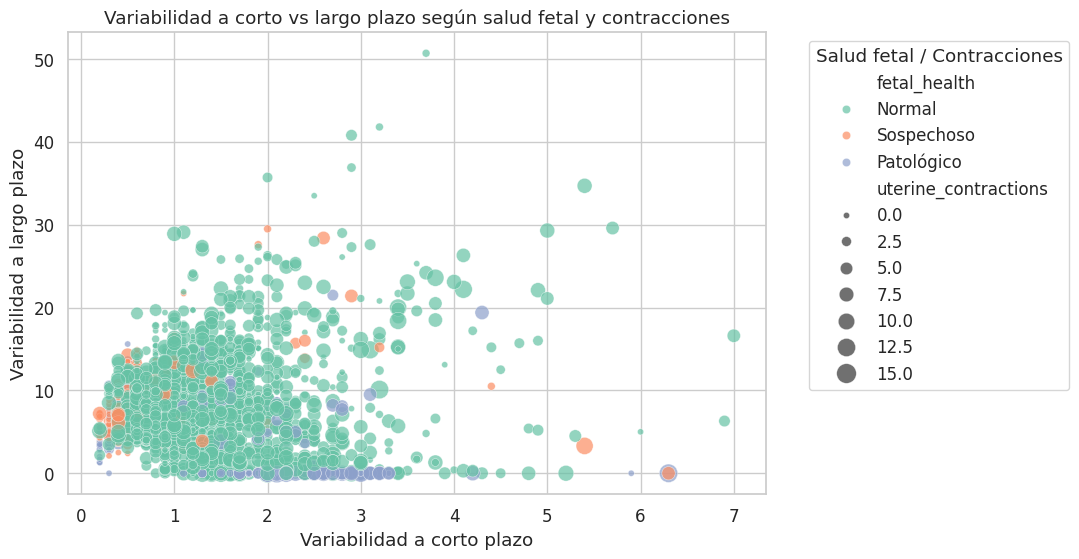

In [6]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df,
    x="mean_value_of_short_term_variability",
    y="mean_value_of_long_term_variability",
    hue="fetal_health",
    size="uterine_contractions",
    sizes=(20,200),
    palette="Set2",
    alpha=0.7
)

# Mapear manualmente las etiquetas de la leyenda de 'fetal_health'
label_map = {"1.0": "Normal", "2.0": "Sospechoso", "3.0": "Patológico"}

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [label_map.get(l, l) for l in labels]  # reemplaza solo si está en el diccionario

plt.legend(handles, new_labels, title="Salud fetal / Contracciones", bbox_to_anchor=(1.05, 1), loc=2)

plt.title("Variabilidad a corto vs largo plazo según salud fetal y contracciones")
plt.xlabel("Variabilidad a corto plazo")
plt.ylabel("Variabilidad a largo plazo")
plt.show()

### Interpretación
El gráfico muestra la relación entre la **variabilidad de la frecuencia cardíaca fetal** a corto y largo plazo,
con los colores representando las categorías de **salud fetal** y el **tamaño de los puntos**
representando la cantidad de **contracciones uterinas**.

- Los **fetos normales** presentan mayor variabilidad en ambos ejes, lo que refleja un estado fisiológico saludable.  
- Los **sospechosos** aparecen en posiciones intermedias, con menor variabilidad que los normales.  
- Los **patológicos** se concentran en la zona de baja variabilidad, lo que confirma la hipótesis de
que la pérdida de variabilidad se asocia con riesgo fetal.  
- El tamaño de los puntos indica la magnitud de contracciones uterinas: aunque en la leyenda aparecen
valores decimales (0.0025, 0.0150, etc.), estos son **valores escalados que Seaborn utiliza para
ajustar el tamaño relativo de los puntos**, no el número real de contracciones.  
  En la práctica, los puntos más grandes corresponden a exámenes con mayor cantidad de contracciones,
mientras que los más pequeños representan casos con pocas o nulas contracciones.

En conclusión, el gráfico sugiere que la **variabilidad reducida** es un mejor indicador de riesgo fetal
que la cantidad de contracciones uterinas, aunque ambos factores se pueden analizar de forma complementaria.

##Gráfico 3 – Mapa de calor de correlaciones

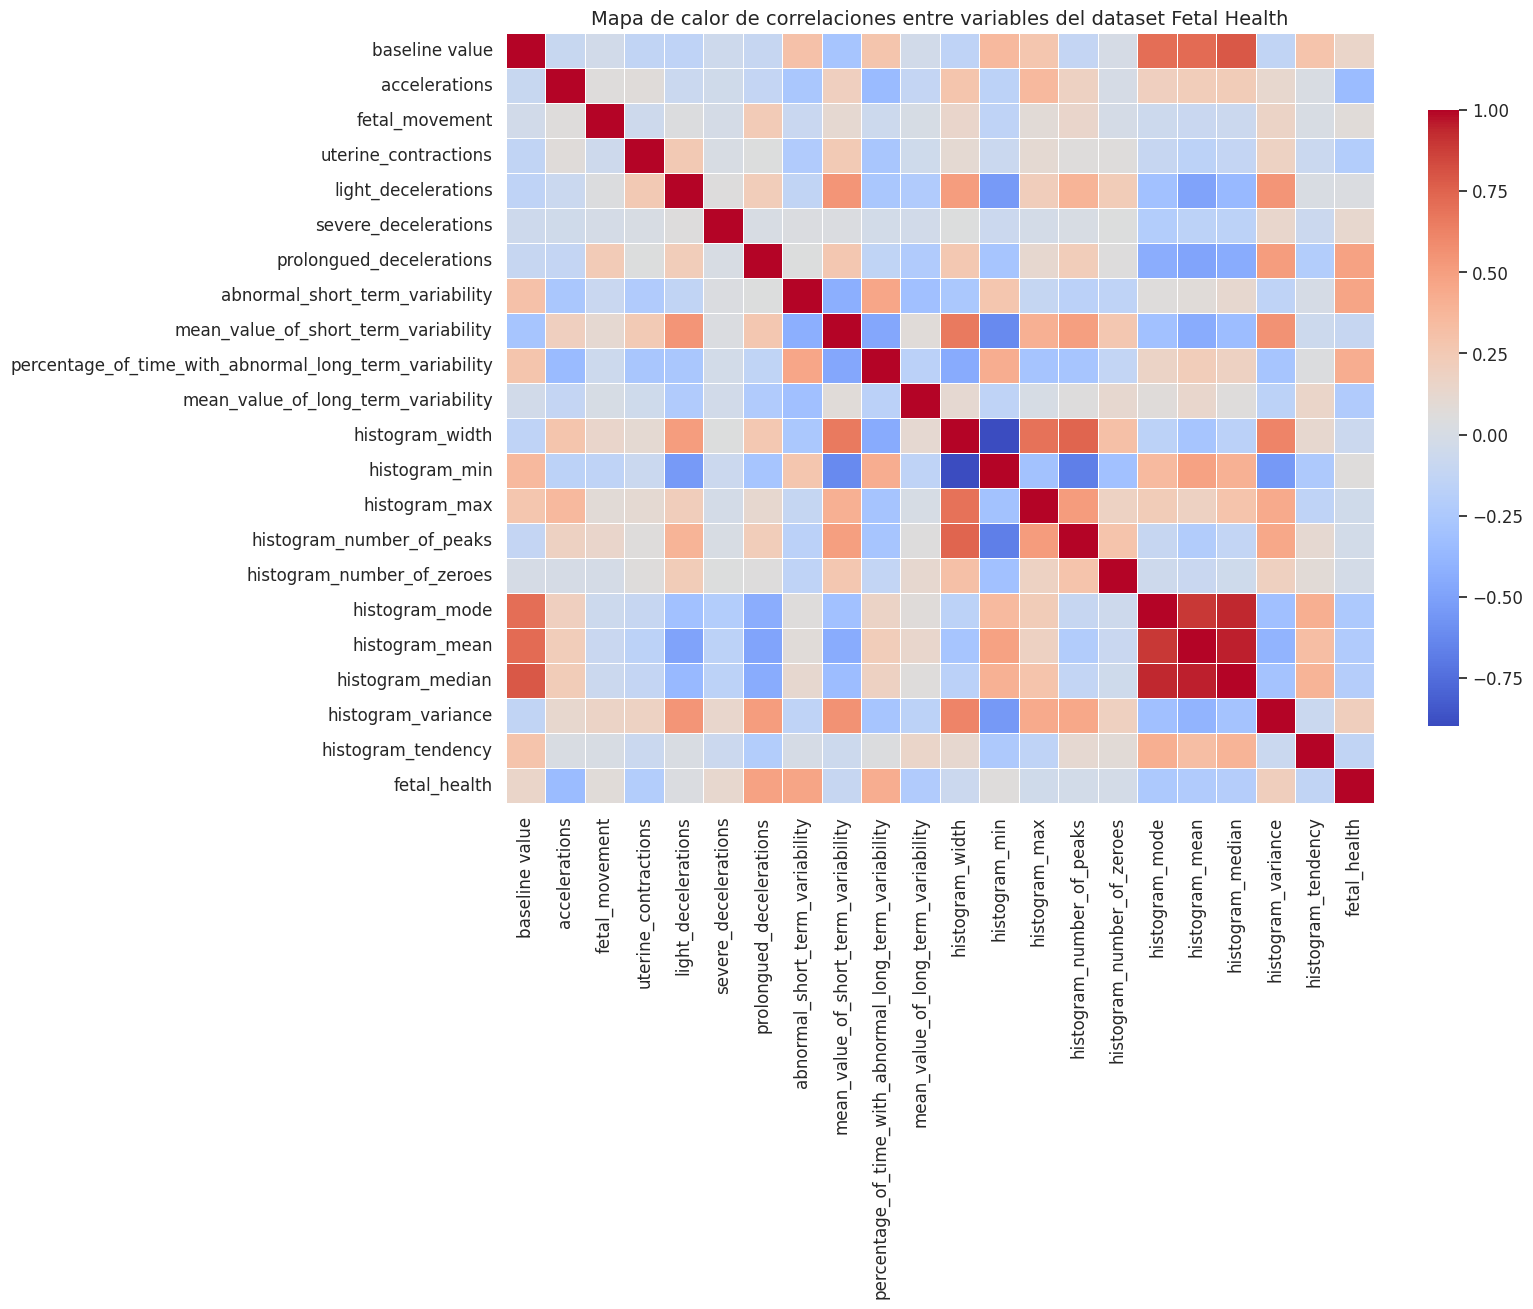

In [7]:
plt.figure(figsize=(14,10))
corr = df.corr()

# Heatmap de correlaciones
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,     # podés poner True si querés mostrar los valores numéricos
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Mapa de calor de correlaciones entre variables del dataset Fetal Health", fontsize=14)
plt.show()

### Interpretación
El mapa de calor muestra las **correlaciones lineales** entre todas las variables numéricas del dataset.  
Este análisis permite identificar relaciones fuertes y posibles problemas de colinealidad.

- Se observa que varios **estadísticos del histograma** (media, mediana, moda) están altamente
correlacionados entre sí, lo cual era esperable dado que describen la misma distribución.  
- La **variabilidad a corto y largo plazo** también muestran correlaciones importantes con el estado
de salud fetal (`fetal_health`), reforzando las hipótesis planteadas previamente.  
- Algunas variables, como las **desaceleraciones severas** y las **prolongadas**, tienen correlaciones
positivas entre sí y se relacionan con los casos sospechosos y patológicos.  
- La variable `fetal_health` (al ser categórica codificada como 1, 2, 3) aparece correlacionada de manera
moderada con varias medidas de variabilidad y con el número de desaceleraciones.

Este gráfico es útil como diagnóstico general: ayuda a identificar **grupos de variables redundantes**
que aportan información similar, y a reconocer qué variables parecen tener una mayor relevancia para
explicar el estado de salud fetal.  
En fases posteriores del proyecto (modelado predictivo), estos hallazgos serán clave para
la **selección de características** y la reducción de la dimensionalidad.

## Vinculación de resultados con las preguntas e hipótesis

1. **Hipótesis**: Los casos patológicos presentan un valor basal más alto y más variable en comparación con los casos normales.

      - Evidencia: El gráfico de dispersión (baseline vs aceleraciones) muestra que los casos patológicos
      (**color verde**) se concentran con muy pocas aceleraciones, lo que indica un ritmo menos reactivo.
      Los normales (**color rojo**), en cambio, presentan valores intermedios de frecuencia basal y más aceleraciones.
      Los sospechosos (**color azul**) aparecen dispersos en valores intermedios, con menor cantidad de aceleraciones
      que los normales.

2. **Hipótesis:** Los fetos clasificados como patológicos tienen una mayor frecuencia de desaceleraciones.  
   - Evidencia: El análisis descriptivo y las correlaciones muestran que las **desaceleraciones severas
     y prolongadas** se asocian a peores estados de salud fetal.

3. **Hipótesis:** Una menor variabilidad (corto y largo plazo) se asocia con casos sospechosos y patológicos.  
   - Evidencia: El gráfico de dispersión (variabilidad corto vs largo plazo) confirma que los **patológicos
     tienen valores muy reducidos**, mientras que los normales presentan mayor variabilidad.

4. **Hipótesis:** Los estadísticos del histograma diferencian a los fetos normales de los patológicos.  
   - Evidencia: El mapa de calor muestra que los **estadísticos del histograma** (media, mediana, moda,
     varianza) están correlacionados y aportan información sobre la clasificación, aunque con posible redundancia.

5. **Hipótesis:** La mayoría de los casos corresponden a fetos normales (desbalance de clases).  
   - Evidencia: El análisis de frecuencias en `fetal_health` confirma que los **normales son mayoría**,
     mientras que las clases sospechosas y patológicas están menos representadas.

# **Fase II – Modelado Predictivo y Machine Learning**

En esta segunda etapa se implementan técnicas de **aprendizaje supervisado**
para construir un modelo de clasificación que permita predecir la categoría de salud fetal
(*Normal, Sospechoso o Patológico*) a partir de las variables clínicas del examen cardiotocográfico.

El flujo de trabajo incluirá los siguientes pasos:

1. **Preparación de datos y selección de características**  
   Reducción de dimensionalidad mediante métodos de selección de variables.

2. **Entrenamiento del modelo**  
   Entrenamiento de un algoritmo de clasificación (Random Forest).

3. **Evaluación del rendimiento**  
   Cálculo de métricas básicas (accuracy, recall, precision, F1-score y matriz de confusión).

4. **Conclusiones**  
   Interpretación de los resultados, identificación de variables más relevantes y propuestas de mejora.

###**Separar variables predictoras y objetivo**


In [8]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)


Dimensión de X: (2126, 21)
Dimensión de y: (2126,)


### **Análisis de correlación entre variables**

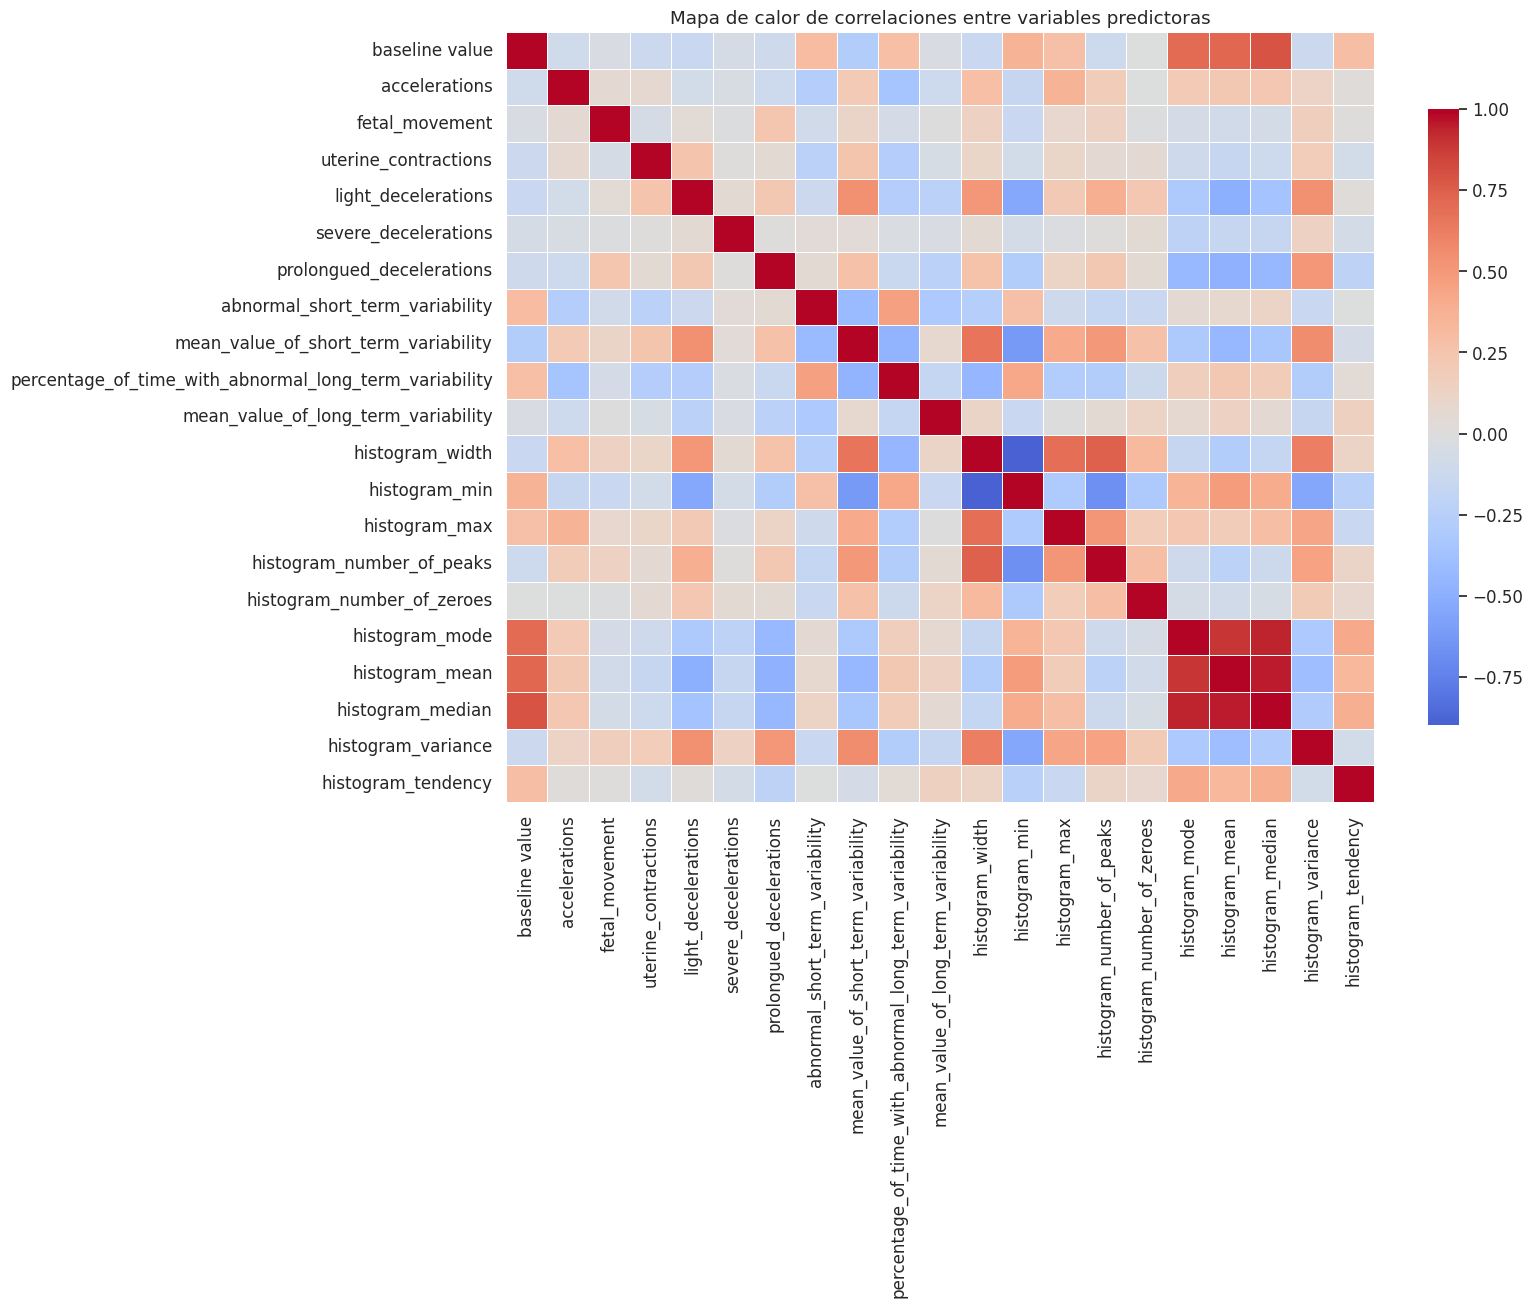

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlaciones solo con las variables predictoras
corr = X.corr()

# Graficar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Mapa de calor de correlaciones entre variables predictoras")
plt.show()

### **Análisis de correlación**

El mapa de calor permite visualizar las relaciones entre las variables predictoras del dataset.

🔹 **Variables del histograma:**  
Se observa un bloque de color rojo intenso entre las variables
`histogram_mean`, `histogram_median`, `histogram_mode` y `histogram_variance`.  
Esto indica una **alta correlación positiva** (superior a 0.9 entre algunas de ellas),
lo cual sugiere que aportan información muy similar.  
En consecuencia, podría seleccionarse solo una o dos de estas variables representativas
para evitar colinealidad.

🔹 **Variabilidad fetal:**  
Las variables `mean_value_of_short_term_variability` y
`mean_value_of_long_term_variability` muestran una correlación moderada (alrededor de 0.5–0.7),
lo cual es lógico ya que ambas describen la estabilidad de la frecuencia cardíaca fetal.  
Aun así, ambas pueden aportar información complementaria al modelo.

🔹 **Frecuencia basal y aceleraciones:**  
Se nota una correlación leve entre `baseline value` y `accelerations`,
en línea con lo visto en el EDA: los fetos normales tienden a tener
valores intermedios de frecuencia basal y más aceleraciones.

🔹 **Conclusión general:**  
Aunque la mayoría de las variables no presentan correlaciones extremadamente altas,
algunas (en particular las del histograma) podrían generar **redundancia**.  
Por ello, en el siguiente paso se aplicará un método estadístico de selección de características
(**SelectKBest con ANOVA F-test**) para conservar las más informativas
y reducir la dimensionalidad del modelo.

###**Reducción de dimensionalidad**


In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar SelectKBest con ANOVA F-test para clasificación
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener las variables seleccionadas
selected_features = X.columns[selector.get_support()]

print("Variables seleccionadas por SelectKBest:\n")
print(selected_features)

Variables seleccionadas por SelectKBest:

Index(['baseline value', 'accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'],
      dtype='object')


### **Visualización de importancia estadística**

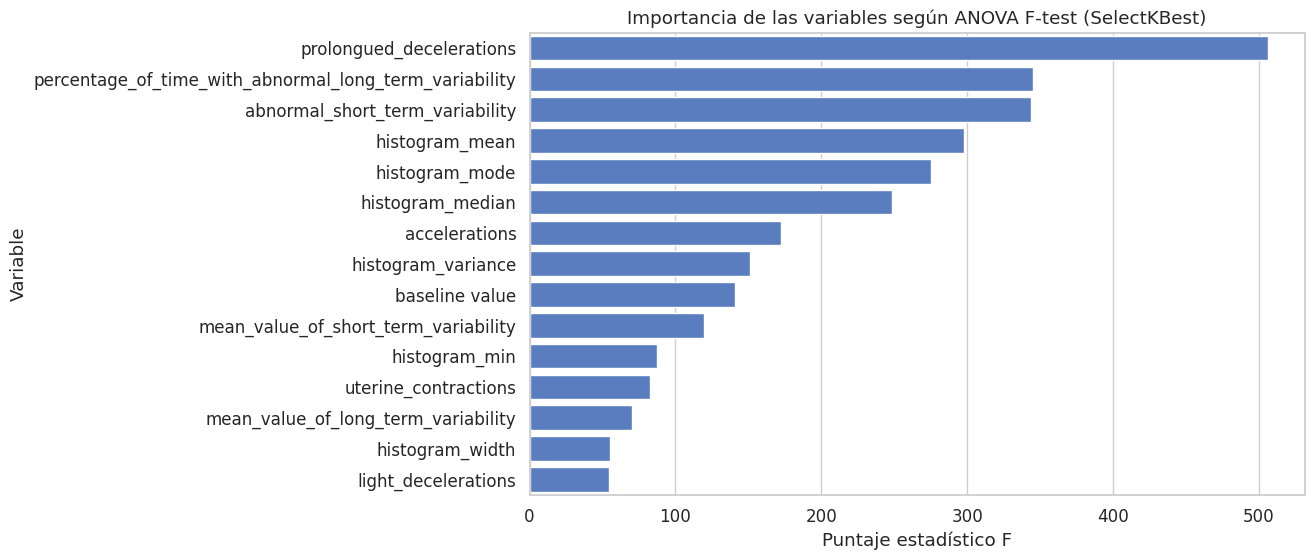

In [11]:
# Crear DataFrame con las puntuaciones
scores_df = pd.DataFrame({
    'Variable': X.columns,
    'Puntaje (F-value)': selector.scores_
}).sort_values(by='Puntaje (F-value)', ascending=False)

# Visualizar las 15 más relevantes
plt.figure(figsize=(10,6))
sns.barplot(x='Puntaje (F-value)', y='Variable', data=scores_df.head(15))
plt.title("Importancia de las variables según ANOVA F-test (SelectKBest)")
plt.xlabel("Puntaje estadístico F")
plt.ylabel("Variable")
plt.show()

## **Interpretación de la selección de características**

El gráfico muestra las variables con mayor capacidad estadística para diferenciar
entre los tres estados de salud fetal (Normal, Sospechoso y Patológico),
según el método **SelectKBest** con prueba **ANOVA F-test**.

🔹 **Variables más relevantes:**  
- `prolongued_decelerations` (desaceleraciones prolongadas) es la variable con mayor puntaje F,
  indicando que tiene una fuerte influencia en la clasificación de la salud fetal.  
- Le siguen `percentage_of_time_with_abnormal_long_term_variability` y
  `abnormal_short_term_variability`, relacionadas con la variabilidad de la frecuencia cardíaca,
  las cuales también reflejan alteraciones fisiológicas importantes.  

🔹 **Variables del histograma:**  
Las variables `histogram_mean`, `histogram_mode` y `histogram_median` presentan altos valores F,
lo que sugiere que los patrones de distribución de la frecuencia cardíaca también son
buenos indicadores de la condición fetal.

🔹 **Otras variables relevantes:**  
`accelerations` y `baseline_value` aparecen con una contribución moderada,
en línea con lo observado en la fase exploratoria: los fetos normales muestran
mayor número de aceleraciones y frecuencia basal estable.

🔹 **Conclusión:**  
Las variables de **variabilidad cardíaca** y **desaceleraciones** son las más informativas
para predecir el estado de salud fetal, seguidas de los descriptores del histograma.  
Este conjunto de características seleccionadas será utilizado en la siguiente etapa
para entrenar el modelo de clasificación.

### **Entrenamiento del modelo de clasificación (Random Forest)**

**Datos divididos entre entrenamiento y prueba**

In [12]:
from sklearn.model_selection import train_test_split

# Usamos solo las variables seleccionadas por SelectKBest
X_selected = df[selected_features]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1700, 10)
Tamaño del conjunto de prueba: (426, 10)


**Entrenamiento de modelo**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predicciones**

In [15]:
y_pred = model.predict(X_test)

**Evaluación de rendimiento**

Accuracy del modelo: 0.9319

Reporte de clasificación:

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.87      0.68      0.76        59
         3.0       0.86      0.89      0.87        35

    accuracy                           0.93       426
   macro avg       0.89      0.85      0.87       426
weighted avg       0.93      0.93      0.93       426



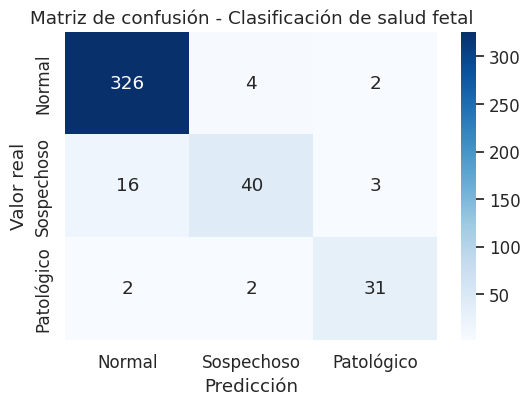

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas principales
print("Accuracy del modelo:", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Sospechoso', 'Patológico'],
            yticklabels=['Normal', 'Sospechoso', 'Patológico'])
plt.title("Matriz de confusión - Clasificación de salud fetal")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

## **Evaluación del modelo Random Forest**

El modelo alcanzó una **precisión global (accuracy) del 93 %**,
lo que indica un excelente desempeño general.

- La clase **Normal (1.0)** fue la mejor identificada, con una precisión del 95 %
  y una sensibilidad del 98 %, lo que demuestra que el modelo casi no comete
  falsos negativos en esta categoría.  

- La clase **Sospechoso (2.0)** muestra el rendimiento más bajo, con un recall del 68 %.
  El modelo tiende a clasificar algunos casos sospechosos como normales,
  lo cual es esperable debido a la similitud entre ambos estados.  

- La clase **Patológico (3.0)** alcanza valores de precisión y recall cercanos al 90 %,
  indicando una buena capacidad del modelo para detectar situaciones de riesgo fetal.

La **matriz de confusión** confirma que la mayoría de las predicciones son correctas,
con errores concentrados principalmente en los límites entre las clases *Normal* y *Sospechoso*.  
En conjunto, el modelo demuestra un alto poder predictivo y una adecuada generalización,
siendo una herramienta potencialmente útil para apoyar la evaluación automatizada
del estado de salud fetal.

### **Analisis de importancia de variables utilizadas**

/tmp/ipython-input-1098254557.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


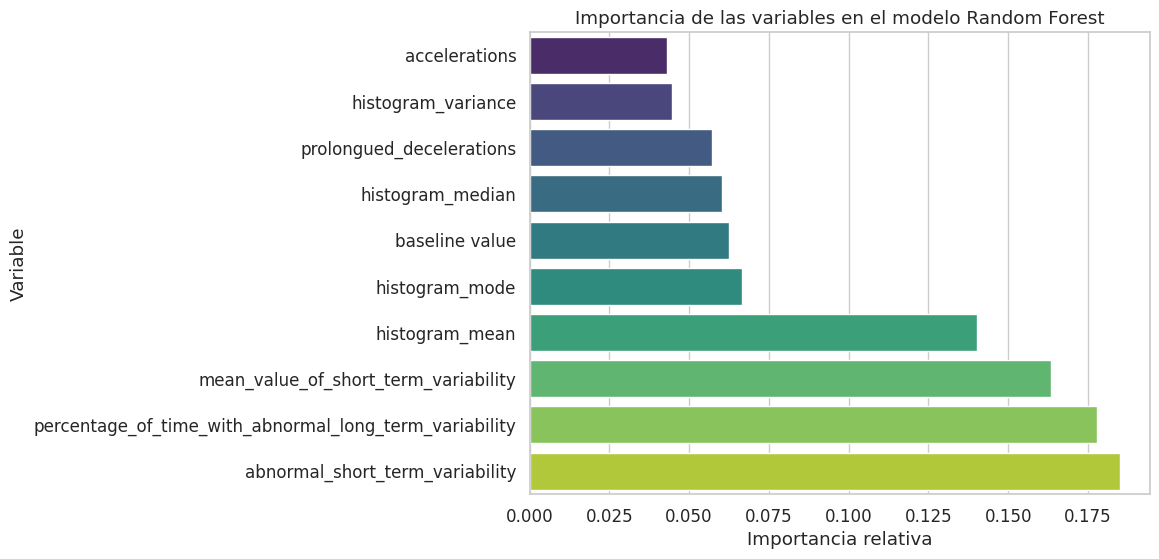

,0
abnormal_short_term_variability,0.185005
percentage_of_time_with_abnormal_long_term_variability,0.177664
mean_value_of_short_term_variability,0.163333
histogram_mean,0.140080
histogram_mode,0.066637
baseline value,0.062369
histogram_median,0.060173
prolongued_decelerations,0.057060
histogram_variance,0.044522
accelerations,0.043157


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancias de cada variable
importances = pd.Series(model.feature_importances_, index=selected_features)

# Ordenar de mayor a menor
importances = importances.sort_values(ascending=True)

# Visualizar
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Importancia de las variables en el modelo Random Forest")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.show()

# Mostrar valores en tabla
importances.sort_values(ascending=False)


## **Importancia de variables según el modelo Random Forest**

El gráfico muestra la importancia relativa de las variables utilizadas en el modelo,
según su contribución a las decisiones de los árboles que componen el Random Forest.

Las variables más influyentes fueron las relacionadas con la **variabilidad de la frecuencia cardíaca fetal**,
particularmente:

- **`abnormal_short_term_variability`**, la más relevante del modelo, indica que una variabilidad
  reducida a corto plazo es un fuerte predictor de riesgo fetal.
- **`percentage_of_time_with_abnormal_long_term_variability`** y
  **`mean_value_of_short_term_variability`** también aportan de forma significativa,
  lo que refuerza la importancia de analizar los patrones de estabilidad del ritmo cardíaco.

Las variables del **histograma** (`histogram_mean`, `histogram_mode`, `histogram_median`)
y la **frecuencia basal** (`baseline_value`) tienen una contribución intermedia,
mientras que las **desaceleraciones prolongadas** y las **aceleraciones**
tuvieron menor impacto en la predicción.

En conjunto, los resultados del modelo confirman que la **variabilidad de la frecuencia cardíaca**
es el factor más determinante para la clasificación de la salud fetal,
seguido por los parámetros estadísticos del histograma.

# **Conclusiones Finales**

El presente proyecto abordó el análisis y modelado del dataset **Fetal Health Classification**,
proveniente de registros de cardiotocografía fetal, con el objetivo de identificar los factores
más relevantes asociados a la salud fetal y construir un modelo capaz de clasificar los casos
como *Normal*, *Sospechoso* o *Patológico*.

### Fase I – Análisis Exploratorio
Durante la etapa exploratoria se examinó la estructura del dataset,
confirmando la ausencia de valores faltantes y la presencia de variables numéricas bien definidas.  
Las visualizaciones mostraron que las características más asociadas al riesgo fetal
eran las **desaceleraciones prolongadas** y la **disminución de la variabilidad**
a corto y largo plazo de la frecuencia cardíaca.

El análisis de correlaciones permitió detectar redundancias entre los estadísticos del histograma
(media, mediana, moda), por lo que se consideró necesaria una reducción de dimensionalidad.

### Fase II – Modelado Predictivo
Para seleccionar las variables más informativas se aplicó el método **SelectKBest** con prueba **ANOVA F-test**,
identificando a las variables relacionadas con la **variabilidad cardíaca** y las **desaceleraciones**
como las de mayor poder discriminante.

Con dichas variables se entrenó un modelo de **Random Forest Classifier**,
que alcanzó una **precisión (accuracy) del 93 %**.  
El modelo presentó un excelente desempeño en la clasificación de fetos **normales**,
un rendimiento adecuado en los **patológicos** y un ligero descenso de precisión en los **sospechosos**,
lo que es clínicamente esperable dada la similitud entre estas categorías.

La **matriz de confusión** mostró una clara tendencia a predecir correctamente los casos normales,
con la mayoría de los errores concentrados entre las clases *Normal* y *Sospechoso*.

El análisis de **importancia de variables** en el modelo final confirmó que la **variabilidad de la frecuencia cardíaca**
(especialmente la variabilidad a corto plazo) constituye el factor más determinante para predecir
el estado de salud fetal, seguido de los **parámetros del histograma** y las **desaceleraciones**.

### Conclusión general
Los resultados obtenidos reflejan una **alta capacidad predictiva del modelo**,
coherente con los hallazgos del análisis exploratorio y con la evidencia clínica.  
El modelo de Random Forest demostró ser una herramienta robusta para la clasificación de la salud fetal,
capaz de priorizar los factores fisiológicos más relevantes.


En síntesis, el trabajo permitió integrar análisis estadístico, visualización de datos
y aprendizaje automático en un flujo completo de *Data Science*,
demostrando cómo la combinación de estas técnicas puede contribuir
a la **detección temprana del riesgo fetal** y al apoyo en la toma de decisiones clínicas.